# JORGE NAVARRO GONZÁLEZ - MARIO UBIERNA SAN MAMÉS

## Práctica 9 - MODELO DE PREFERENTIAL ATTACHMENT

In [1]:
#Importaciones
import networkx as nx
import matplotlib.pyplot as plt
import random as random
import numpy as np
import itertools as it
from scipy import stats

#### 1 Preferential Attachment model (1999)

In [2]:
def aleatorio(inicio, valor):
    x = np.random.randint(0, inicio)
    while x == valor:
        x = np.random.randint(0, inicio)
    return x

def preferentialAttachment(N, inicio, enlaces):
    G = nx.Graph()
    G.add_edges_from(it.combinations(range(inicio),2))
    nodo_actual = G.number_of_nodes()
    lista = []
    lista_aux = []
    '''
    #Comprobamos que todos los nodos tienen un enlace, de lo contrario lo añadimos
    for node in G.nodes:
        if G.degree(node) == 0:
            G.add_edge(node, aleatorio(inicio, node))
            '''
            
    #Obtenemos el grado de todos los nodos
    for node in G.nodes:
        for grado in range(G.degree(node)):
            lista.append(node)
    
    #Añadimos el nuevo nodo con sus enlaces
    for i in range(N-inicio):
                
        #G.add_node(nodo_actual) #Añadimos el nodo al grafo
        
        #Añadimos los enlaces para ese nodo
        for enlace in range(enlaces):
            nodo_a_enlazar = random.choice(lista)
            while G.has_edge(nodo_a_enlazar, nodo_actual):
                nodo_a_enlazar = random.choice(lista)
            G.add_edge(nodo_a_enlazar, nodo_actual)
            lista_aux.append(nodo_a_enlazar)
            lista_aux.append(nodo_actual)
            
        lista += lista_aux
        lista_aux = []
            
        nodo_actual += 1
        
    return G

C:\Users\mario\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


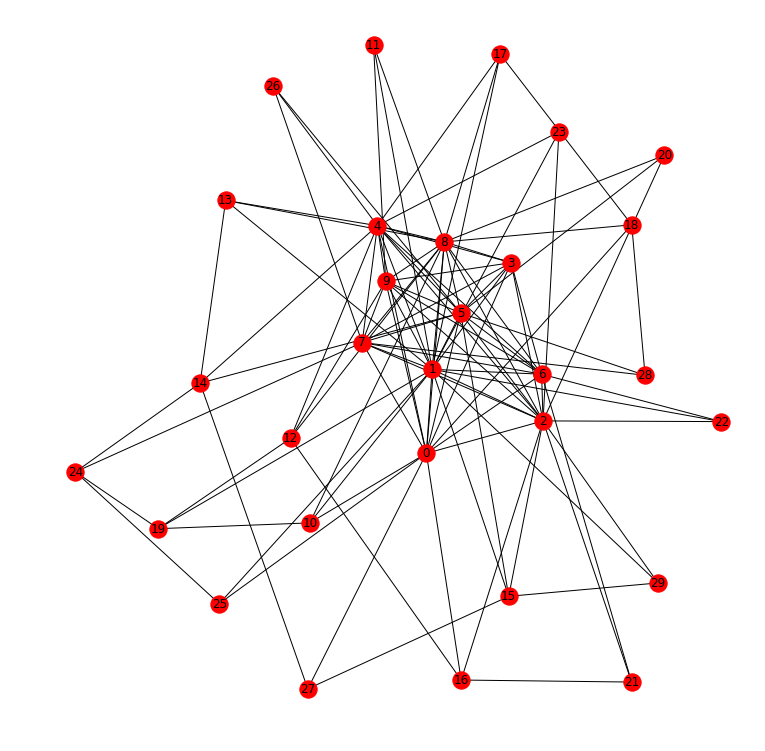

In [3]:
G = preferentialAttachment(30,10,3)
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)

#### 2 Distribución de grado

##### 2.1 Represente la distribución de grado de una realización de 1000 nodos del modelo modelo PA(N=1000,mo=3, m=2). Recuerde la función: matplotlib.pyplot.hist()

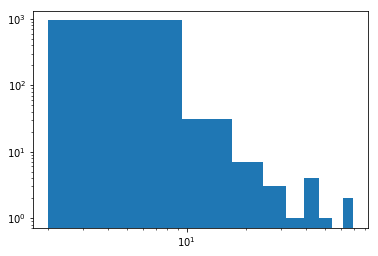

In [4]:
grados_nodos = []
G = preferentialAttachment(1000,3,2)

for nodo in G.nodes():
    grados_nodos.append(G.degree(nodo))
    
plt.hist(grados_nodos,9)
plt.yscale('log', nonposy = 'clip')
plt.xscale('log')

##### 2.2 (Opcional) Estime mediante el método que quiera el parámetro de la distribución power-law del grado (recuerde los resultados de la práctica de distribuciones de potencia)

##### Estimación parámetro de power law

In [5]:
clases = np.array([2**x for x in range(1,8)])
print(min(grados_nodos))
print(max(grados_nodos))
print(clases)
histograma, bin_enlaces =np.histogram(np.array(grados_nodos),bins=clases)
print(histograma)
pendiente, intercept, correlacion, pvalor, error = stats.linregress(np.log(bin_enlaces[0:-1]),np.log(histograma))
print("Pendiente: " + str(pendiente))
print("El P-Valor: " + str(pvalor))
print("Coeficiente de correlación: "+ str(correlacion))

2
69
[  2   4   8  16  32  64 128]
[691 225  66  10   6   2]
Pendiente: -1.7306180456542866
El P-Valor: 0.00010378476447166599
Coeficiente de correlación: -0.9916703849960783


(array([934.,  48.,   6.,   4.,   1.,   2.,   2.,   1.,   0.,   2.]),
 array([ 2. ,  8.7, 15.4, 22.1, 28.8, 35.5, 42.2, 48.9, 55.6, 62.3, 69. ]),
 <a list of 10 Patch objects>)

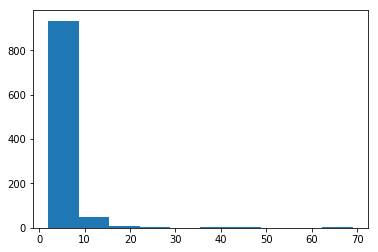

In [6]:
#Ajuste regresión Virginia
#Importación de las librerías necesarias
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

degreeDict = dict(G.degree())
plt.hist(degreeDict.values())

In [7]:
#Defino clase variable logarítmica
vir_bins = np.array([2**i for i in range(0,8)])
v_freq, v_bins = np.histogram(list(degreeDict.values()), bins = vir_bins)

In [8]:
#Normalizo dividiendo por el ancho de la clase
ancho_clase = vir_bins[0:-1]
v_freq_norm = list()
for i in range(0, len(v_freq)):
    v_freq_norm.append(v_freq[i]/np.array(ancho_clase[i]))

<BarContainer object of 7 artists>

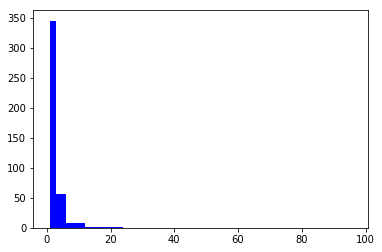

In [9]:
plt.bar(v_bins[0:-1], v_freq_norm, width = ancho_clase, facecolor = 'blue')

In [10]:
vir_bins

array([  1,   2,   4,   8,  16,  32,  64, 128])

In [11]:
v_freq_norm

[0.0, 345.5, 56.25, 8.25, 0.625, 0.1875, 0.03125]

In [12]:
v_freq_norm = v_freq_norm[1:]

In [13]:
vir_bins = vir_bins[1:]

In [14]:
vir_bins

array([  2,   4,   8,  16,  32,  64, 128])

In [15]:
scipy.stats.linregress(x = np.log(vir_bins[:-1]), y = np.log(v_freq_norm))

LinregressResult(slope=-2.730618045654287, intercept=7.687070018196771, rvalue=-0.9966290064577145, pvalue=1.7026242886365245e-05, stderr=0.11238933090263539)

In [16]:
pendiente, intercept, correlacion, pvalor, error = stats.linregress(x = np.log(vir_bins[:-1]), y = np.log(v_freq_norm))
print("Pendiente: " + str(pendiente))
print("El P-Valor: " + str(pvalor))
print("Coeficiente de correlación: "+ str(correlacion))

Pendiente: -2.730618045654287
El P-Valor: 1.7026242886365245e-05
Coeficiente de correlación: -0.9966290064577145
